In [17]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

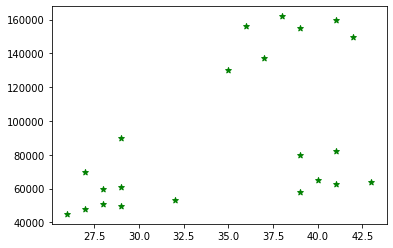

In [20]:
plt.scatter(df['Age'], df['Income($)'], marker = '*', color = 'green')

In [21]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [23]:
y_predicted 
# 3 clusters are created

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [24]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [25]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]


Text(0, 0.5, 'Income($)')

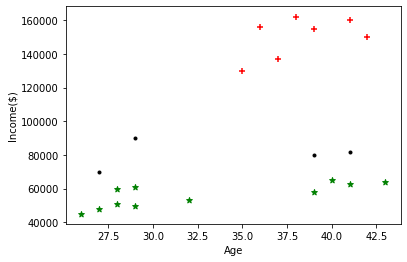

In [31]:
plt.scatter(df0['Age'], df0['Income($)'], marker = '*', color = 'green')
plt.scatter(df1['Age'], df1['Income($)'], marker = '+', color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], marker = '.', color = 'black')

plt.xlabel('Age')
plt.ylabel('Income($)')
# As y and x features are not scaled that's y black and green features are not seperated into clusters properly

In [33]:
# so we do feature scaling in preprocessing
scaler = MinMaxScaler()

In [41]:
# this will fit x and y in the range of 0 to 1
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [42]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [44]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [47]:
km.cluster_centers_
# Centroid of clusters

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

Text(0, 0.5, 'Income($)')

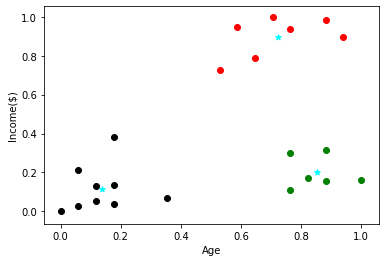

In [50]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], color = 'green')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color='cyan')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [52]:
# When the data is messy and it has many features then use elbow technique
k_rng = range(1, 10)
k_rng

range(1, 10)

In [55]:
sse =[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)    # inertia will give SSE

In [57]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2798062931046178,
 0.23022348815682742,
 0.1746238658668789,
 0.13706529523670866,
 0.10907864282306065]

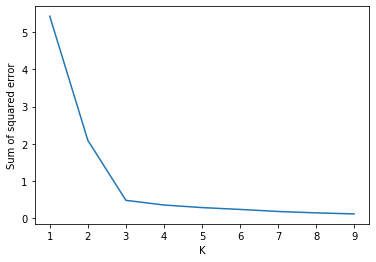

In [58]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)